In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')


Some new function for sns
+ histplot
+ distplot (warning)  
+ sns.pairplot  

Some new function and definition
+ skew 
+ kurt

Scipy
+ from scipy import stats
+ from scipy.stats import norm
+ from scipy.stats import skew
+ from scipy.special import boxcox1p

new way to plot data
+ Q - Q plot 
+ hist plot (also use norm so can compare better peakness and skew)

outlier and normal dist
+ can use log 
+ can apply also for target cols
+ identity skewness and then use cox1p

new model
+ Kernel Ridge (linear reg + ridge (l2) + kernel trick)
+ import xgboost as xgb (customed gradient boosting) 
+ import lightgbm as lgb (customed gradient boosting)

d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

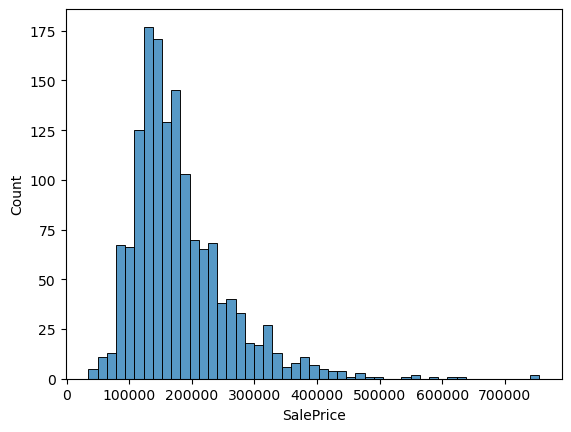

In [3]:
sns.histplot(df_train['SalePrice'])

In [4]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


### What is skewness and kurtosis
+ Skewness: It measures the symmetry of the distribution. A skewness value of 0 indicates a symmetrical distribution. Positive skewness indicates that the right tail of the distribution is longer or fatter than the left tail, while negative skewness indicates that the left tail of the distribution is longer or fatter than the right tail.
+ Kurtosis: It measures the tailedness or peakedness of the distribution. A kurtosis value of 3 indicates a normal distribution. Values greater than 3 indicate heavier tails and a sharper peak (leptokurtic distribution), while values less than 3 indicate lighter tails and a flatter peak (platykurtic distribution).

d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

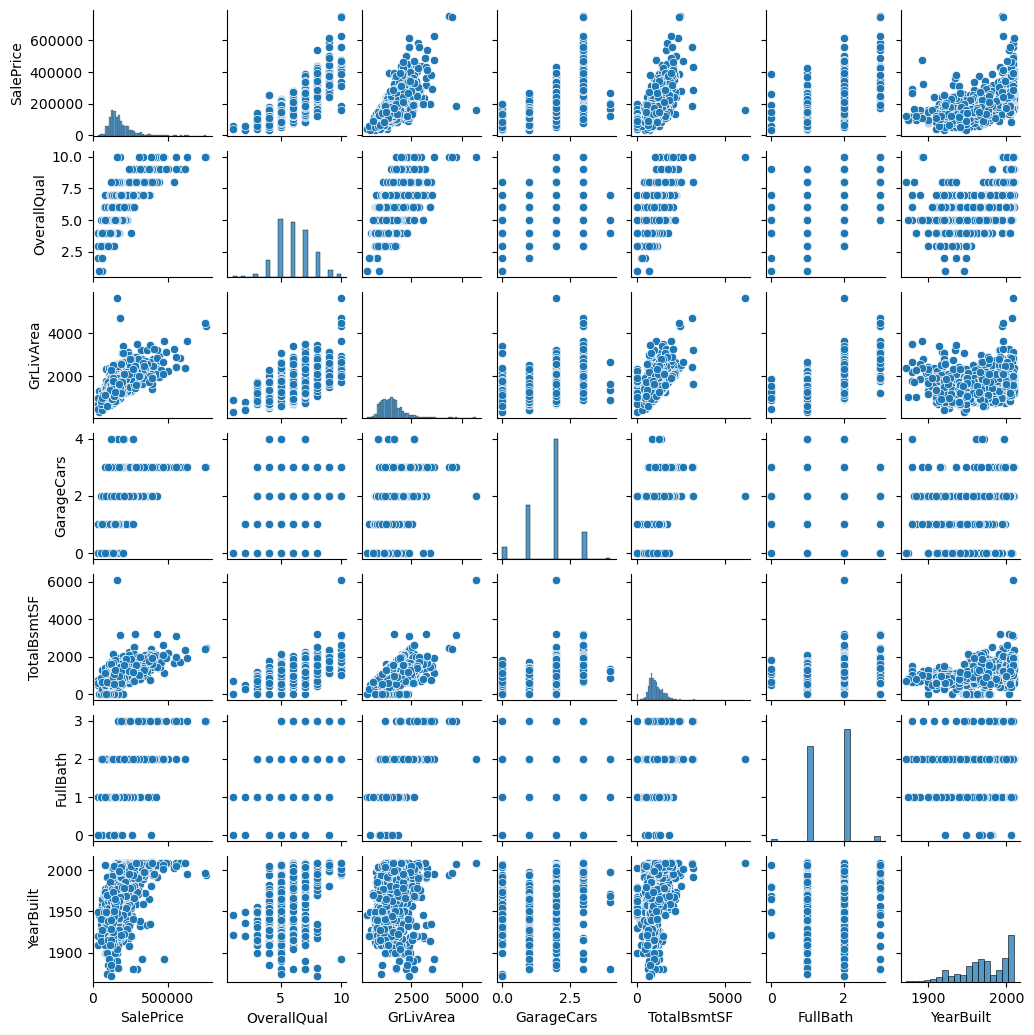

In [5]:

#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 1.5)
plt.show()

### bivariate analysis  

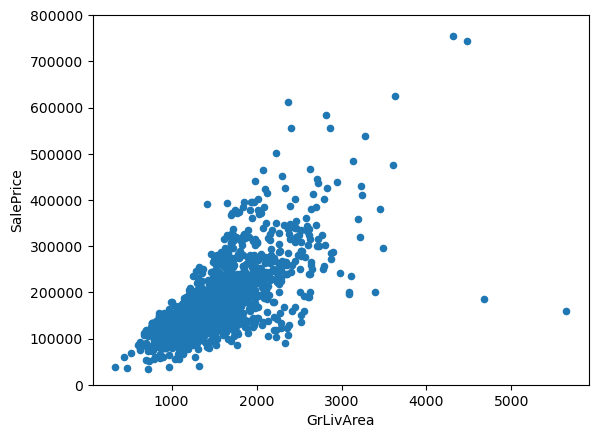

In [6]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [7]:
id_to_drop = df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]["Id"]
for i in id_to_drop.values:
    df_train = df_train.drop(df_train[df_train['Id'] == i].index)


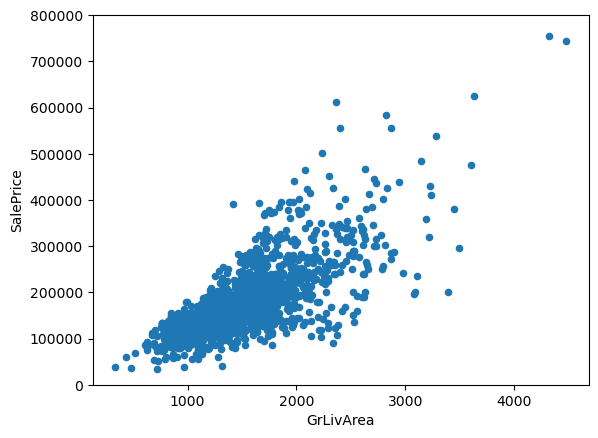

In [8]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_14124\4290759482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=norm)
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


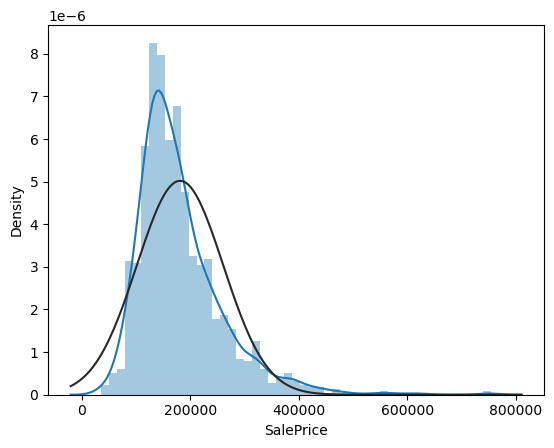

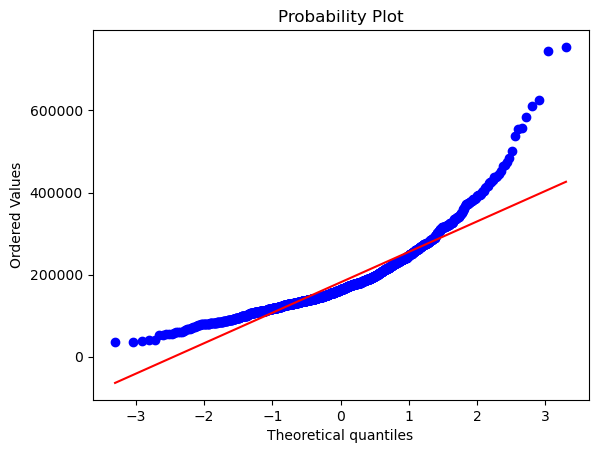

In [9]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [10]:
# here is the magic 
df_train['SalePrice'] = np.log(df_train['SalePrice'])

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_14124\4290759482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=norm)
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


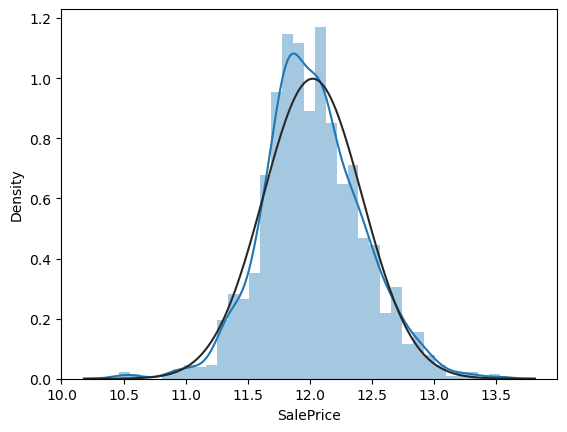

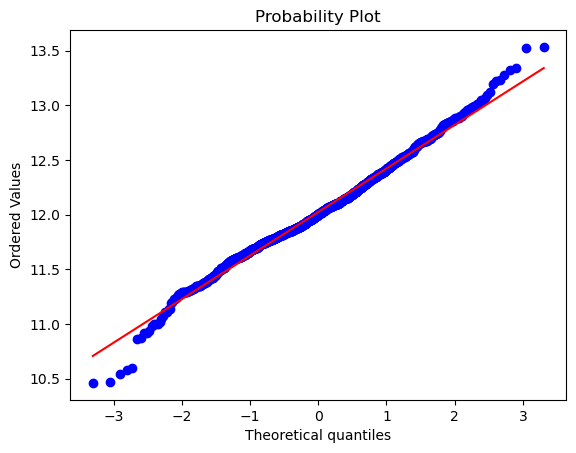

In [11]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### Skewed features



In [12]:
all_data = df_train

In [13]:
from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895
EnclosedPorch,3.083987


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
#Validation function
n_folds = 5

def rmsle_cv(model,train,y_train):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
from sklearn.preprocessing import RobustScaler